In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(384, 512, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(512, 384, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.7),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.6),
    nn.Linear(4096, 2048), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(2048, 10)
)

In [3]:
# Fashion_MNIST的图像分辨率低于ImageNet，先增加分辨率到224*224
batch_size = 320
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)

loss 0.010, train acc 0.997, test acc 0.926
2047.7 examples/sec on cuda:0


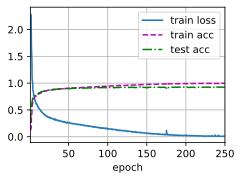

In [4]:
learning_rate, epochs = 0.01, 250
d2l.train_ch6(net, train_iter, test_iter, epochs, learning_rate, d2l.try_gpu())

In [5]:
torch.save(net.state_dict(),'AlexNet_FashionMNIST.pth')